---
title: keras教程-04-手写字体识别
date: 2018-07-20 20:17:55
tags: [keras教程]
toc: true
xiongzhang: false

---
<span></span>
<!-- more -->

> 声明: 本文由[DataScience](http://mlln.cn)编辑发表, 转载请注明[本文链接](http://mlln.cn)mlln.cn, 并在文后留言`转载`.

本文代码运行环境:

- windows10
- python3.6
- jupyter notebook
- tensorflow 1.x
- keras 2.x

In [1]:
%matplotlib inline

### 用Keras建立一个简单的神经网络


这是在Keras的神经网络中进行数字识别的简单快速入门，用于北京师范大学的深度学习教程。它主要基于Keras中的`mnist_mlp.py`示例。


在这篇文章中，您将了解如何使用Keras深度学习库开发深度学习模型，以便在Python中识别MNIST手写数字。完成本教程后，您将了解：

- 如何在Keras中加载MNIST数据集
- 理解图片的数据结构
- 如何开发和评估深度前馈神经网络(Deep Feed Forward)

下面先引入我们需要用到的库:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

d:\mysites\deeplearning.ai-master\.env\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### MNIST手写数字识别问题的描述

这是一项数字识别任务, 有10个数字（0到9）或10个类。

MNIST问题是由Yann LeCun，Corinna Cortes和Christopher Burges开发的用于评估手写数字分类问题的机器学习模型的数据集。该数据集由国家标准与技术研究所（NIST）提供的许多扫描数字构成。这是数据集的名称来源，被称为Modified NIST或MNIST数据集。

每个图像是28x28像素的正方形（总共784个像素）。其中60,000个图像用于训练模型，并且单独的10,000个图像集用于测试模型。

### 加载图片数据

Keras深度学习库提供了加载MNIST数据集的便捷方法。数据集在第一次调用此函数时自动下载，并作为15MB文件存储在`〜/.keras/datasets/mnist.npz`的主目录中。这对于开发和测试深度学习模型非常方便。为了演示加载MNIST数据集是多么容易，我们将首先编写一个小脚本来下载和可视化训练数据集中的第1个图像。(如果你你的程序加载的时候非常慢, 可以自己去这里下载这个文件, 然后放到上面提到的目录中: https://s3.amazonaws.com/img-datasets/mnist.npz)

In [46]:
nb_classes = 10

# 这个方法可以加载数据
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)


In [48]:
# 查看第2个图片的数据:
for i in range(28):
    # 为了容易看出这个图, 我让每个数字占3个位置
    row = [ '{:_<3}'.format(n) for n in X_train[1, i, :]]
    # 打印每行数据
    print(','.join(row))

0__,0__,0__,0__,0__,0__,0__,0__,0__,0__,0__,0__,0__,0__,0__,0__,0__,0__,0__,0__,0__,0__,0__,0__,0__,0__,0__,0__
0__,0__,0__,0__,0__,0__,0__,0__,0__,0__,0__,0__,0__,0__,0__,0__,0__,0__,0__,0__,0__,0__,0__,0__,0__,0__,0__,0__
0__,0__,0__,0__,0__,0__,0__,0__,0__,0__,0__,0__,0__,0__,0__,0__,0__,0__,0__,0__,0__,0__,0__,0__,0__,0__,0__,0__
0__,0__,0__,0__,0__,0__,0__,0__,0__,0__,0__,0__,0__,0__,0__,0__,0__,0__,0__,0__,0__,0__,0__,0__,0__,0__,0__,0__
0__,0__,0__,0__,0__,0__,0__,0__,0__,0__,0__,0__,0__,0__,0__,51_,159,253,159,50_,0__,0__,0__,0__,0__,0__,0__,0__
0__,0__,0__,0__,0__,0__,0__,0__,0__,0__,0__,0__,0__,0__,48_,238,252,252,252,237,0__,0__,0__,0__,0__,0__,0__,0__
0__,0__,0__,0__,0__,0__,0__,0__,0__,0__,0__,0__,0__,54_,227,253,252,239,233,252,57_,6__,0__,0__,0__,0__,0__,0__
0__,0__,0__,0__,0__,0__,0__,0__,0__,0__,0__,10_,60_,224,252,253,252,202,84_,252,253,122,0__,0__,0__,0__,0__,0__
0__,0__,0__,0__,0__,0__,0__,0__,0__,0__,0__,163,252,252,252,253,252,252,96_,189,253,167,0__,0__,0__,0__,

如果你上过幼儿园, 你应该能看出这个图上的数字是0。然后, 就是图片的本质, 图片本质上就是二维矩阵或者三维的张量。我们现在用到的图片是灰度图片, 没有颜色, 所以只需要一个二维矩阵即可。除了向上面那样查看图片外, 我们更多的是使用下面的方法。

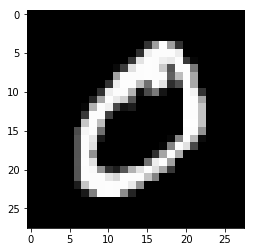

In [22]:
plt.imshow(X_train[1], cmap='gray')

### 调整数据格式便于进行计算

我们的神经网络的输入为一个向量，因此我们需要对图片进行整形，以使每个28x28图像成为单个784维向量。我们还将数字缩放到[0-1]范围而不是[0-255]

In [23]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


将目标矩阵修改为one-hot格式，即

```
0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0]
1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]
2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0]
etc.
```

In [24]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

### 创建网络

在这里，我们将做一个简单的3层全连接网络。

<img src="images/network-figure.png" class="img-thumbnail"/>

In [25]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu')) # “激活”只是应用于前一层输出的非线性函数
                              #  relu将所有低于0的值设置为0
# 为了防止过拟合, 我们增加了dropout层
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
# 分类任务的输出通常是softmax, 这保证的所有的输出值都在0-1之间, 并且他们之和为1
model.add(Activation('softmax')) 

### 编译模型

Keras构建在TensorFlow之上，这两个软件包允许您在Python中定义*计算图*，然后它们可以在CPU或GPU上高效编译和运行，而无需Python解释器的开销。

在编写模型时，Keras会要求您指定**损失函数**和**优化器**。我们在这里使用的损失函数称为*分类交叉熵*(categorical_crossentropy)，并且是一种非常适合比较两个概率分布的损失函数。

在这里，我们的预测是十个不同数字的概率分布（例如“我们80％确信这个图像是3, 10％确定它是8, 5％它是2，等等”），而观察值Y_train和Y_text是概率分配正确类别为100％，其他所有类别为0。交叉熵是衡量预测分布与观察值分布的差异的度量。 [维基百科的更多细节](https://en.wikipedia.org/wiki/Cross_entropy)

优化器有助于确定模型学习的速度。我们不会过多详细讨论这个问题，但“adam”通常是一个不错的选择。

In [27]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### 训练模型

这是有趣的部分：您可以将之前加载的训练数据提供给此模型，它将学习对数字进行分类

In [31]:
model.fit(X_train, Y_train,
          batch_size=128, epochs=4,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 7s 108us/step - loss: 0.2432 - acc: 0.9285 - val_loss: 0.1032 - val_acc: 0.9678
Epoch 2/4
60000/60000 [==============================] - 6s 104us/step - loss: 0.1005 - acc: 0.9692 - val_loss: 0.0766 - val_acc: 0.9763
Epoch 3/4
60000/60000 [==============================] - 6s 99us/step - loss: 0.0713 - acc: 0.9773 - val_loss: 0.0665 - val_acc: 0.9799
Epoch 4/4
60000/60000 [==============================] - 6s 106us/step - loss: 0.0560 - acc: 0.9817 - val_loss: 0.0646 - val_acc: 0.9805


### 最后，评估其性能

In [33]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 0s 48us/step
Test score: 0.06461735829573591
Test accuracy: 0.9805


### 检查输出

检查输出并确保一切看起来都很好，这总是一个好主意。在这里，我们将看一些正确的例子，以及一些错误的例子。

In [34]:

# predict_classes函数输出最高概率所在的类
predicted_classes = model.predict_classes(X_test)

# 分别得到错误和正确的类
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

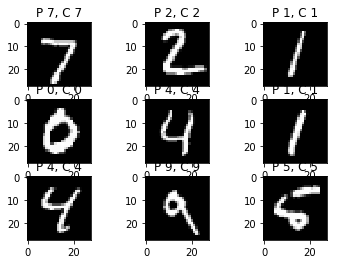

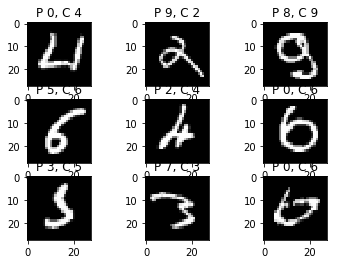

In [36]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("P {}, C {}".format(predicted_classes[correct], y_test[correct]))
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("P {}, C {}".format(predicted_classes[incorrect], y_test[incorrect]))

### 总结

简单地说，dropout指的是在随机选择的某些神经元的训练阶段忽略某些神经元。通过“忽略”，我的意思是在特定的计算过程中不考虑这些单位。技术上，在每个训练阶段，单个节点要么以1-p的概率从网络中丢弃，要么以概率p保持。而所谓的丢弃就是将激活量强制设置为0。

<img src="images/dropout.png" class="img-thumbnail" width="800px"/>
